In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wrangle
import prepare 
import Explore
import evaluate

In [2]:
#load in data
gpa = pd.read_csv('FirstYearGPA.csv')
gpa = gpa.drop(columns='Unnamed: 0')

In [3]:
gpa

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1
...,...,...,...,...,...,...,...,...,...,...
214,3.13,3.41,700,690,1,10.0,19.0,0,1,1
215,2.88,3.58,680,740,0,20.0,3.0,0,0,1
216,2.65,3.15,590,750,1,8.5,8.5,0,1,1
217,2.97,3.09,670,630,0,12.0,4.0,0,1,1


In [4]:
#make sure this data is clean
gpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GPA           219 non-null    float64
 1   HSGPA         219 non-null    float64
 2   SATV          219 non-null    int64  
 3   SATM          219 non-null    int64  
 4   Male          219 non-null    int64  
 5   HU            219 non-null    float64
 6   SS            219 non-null    float64
 7   FirstGen      219 non-null    int64  
 8   White         219 non-null    int64  
 9   CollegeBound  219 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 17.2 KB


In [5]:
gpa.describe()

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,3.096164,3.452740,605.068493,634.292237,0.465753,13.108219,7.248858,0.114155,0.789954,0.922374
std,0.465476,0.374794,83.393452,75.235572,0.499969,7.224647,5.000315,0.318728,0.408274,0.268194
min,1.930000,2.340000,260.000000,430.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.745000,3.170000,565.000000,580.000000,0.000000,8.000000,3.000000,0.000000,1.000000,1.000000
50%,3.150000,3.500000,610.000000,640.000000,0.000000,13.000000,6.000000,0.000000,1.000000,1.000000
75%,3.480000,3.760000,670.000000,690.000000,1.000000,17.000000,11.000000,0.000000,1.000000,1.000000
max,4.150000,4.000000,740.000000,800.000000,1.000000,40.000000,21.000000,1.000000,1.000000,1.000000


In [6]:
#gpa and sat scores are 2 different units of measure, this data should be scaled. 

In [7]:
#no nulls
gpa.isna().sum()

GPA             0
HSGPA           0
SATV            0
SATM            0
Male            0
HU              0
SS              0
FirstGen        0
White           0
CollegeBound    0
dtype: int64

In [8]:
#split data
train, validate, test = wrangle.split_for_model(gpa.drop(columns=['FirstGen','White','CollegeBound'])) #dropping not used columns, too skewed

train(122, 7),validate(53, 7),test(44, 7)


In [9]:
#scale data
train_scaled, validate_scaled, test_scaled = prepare.scale_data(train, validate, test, scale_type='MinMax')

In [10]:
train_scaled.head()

,GPA,HSGPA,SATV,SATM,Male,HU,SS
0,0.236715,0.951807,0.750000,0.729730,1.0,0.200,0.142857
1,0.516908,0.819277,0.750000,0.837838,1.0,0.175,0.857143
2,0.574879,0.548193,0.812500,0.567568,0.0,0.250,0.142857
3,0.661836,0.734940,0.916667,0.567568,1.0,0.250,0.476190
4,0.371981,0.548193,0.791667,0.567568,1.0,0.225,0.809524


In [11]:
#lets plot some correlation graphs

/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


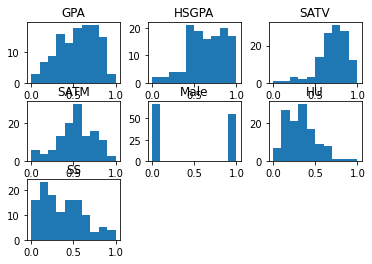

In [12]:
Explore.get_distribution(train_scaled)

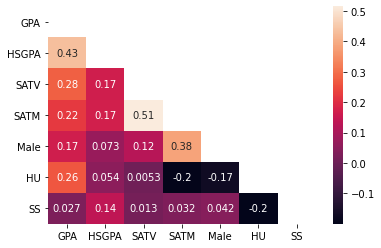

In [13]:
Explore.get_heatmap(train_scaled)

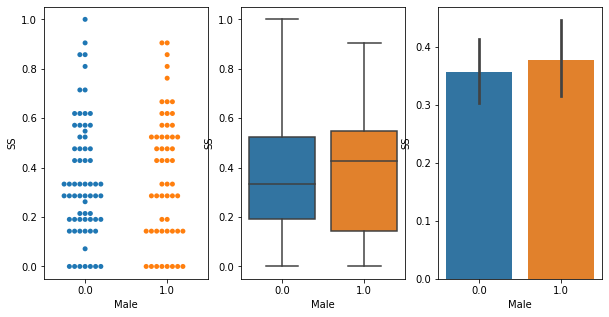

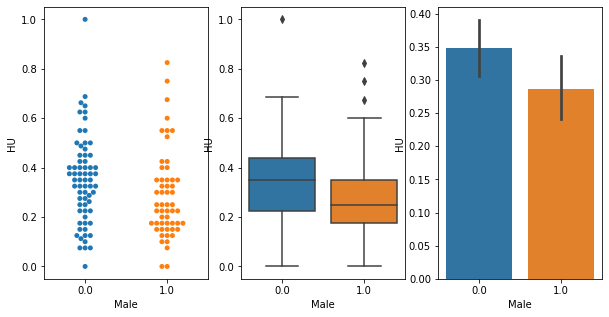

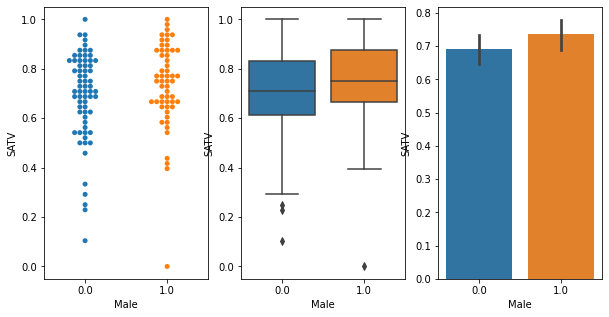

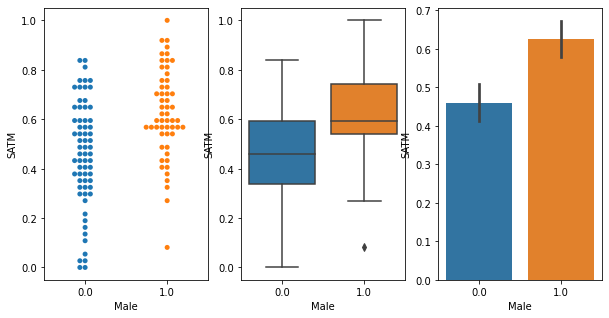

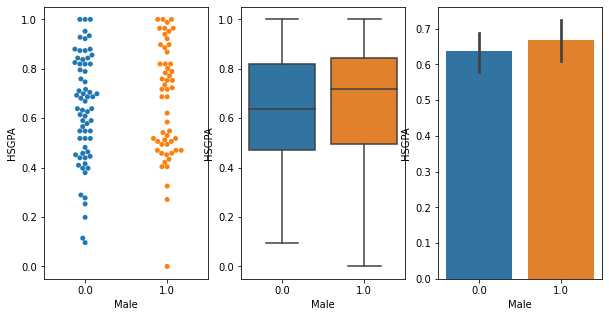

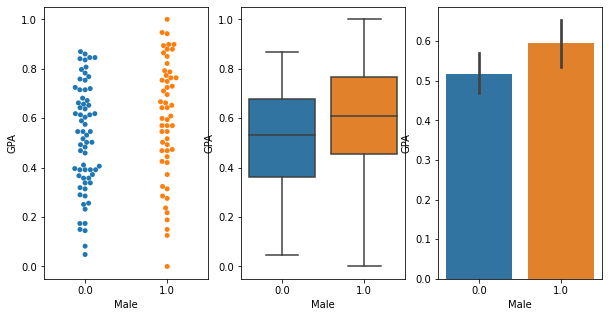

In [14]:
catvars = ['Male']
contvars = ['SS', 'HU','SATV','SATM', 'HSGPA', 'GPA']
Explore.plot_cat_and_cont(catvars, contvars, train_scaled )

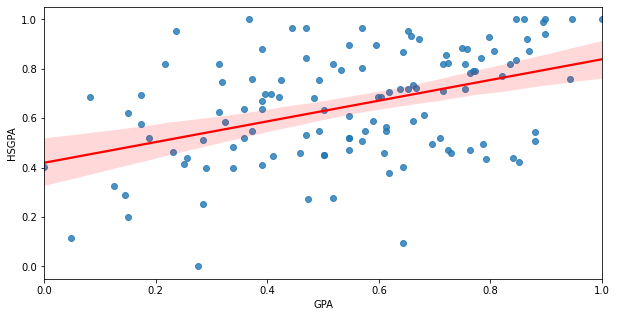

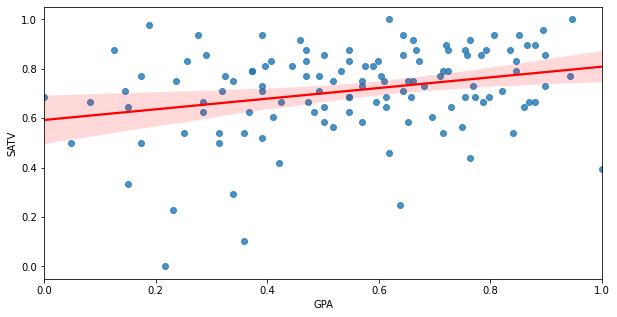

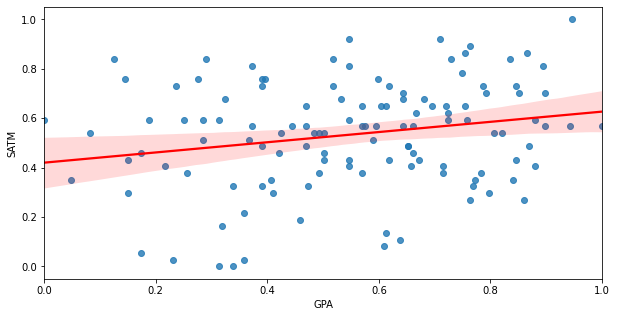

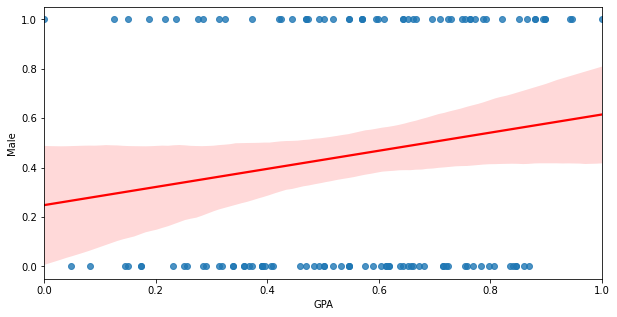

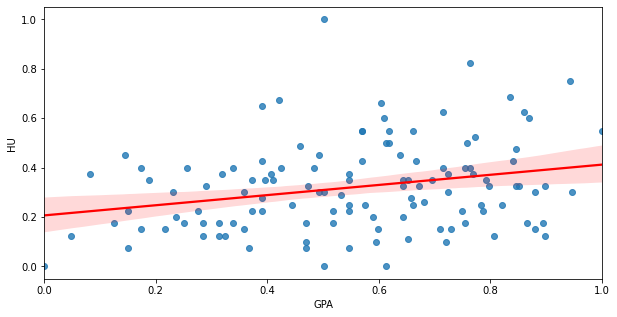

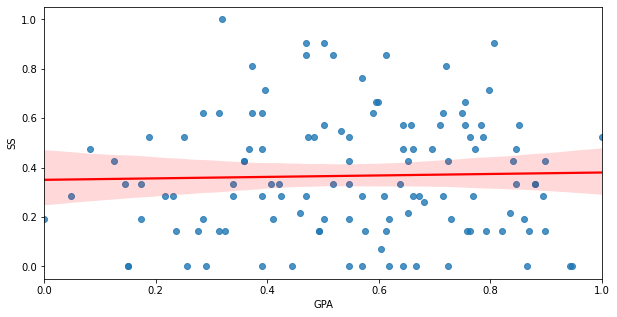

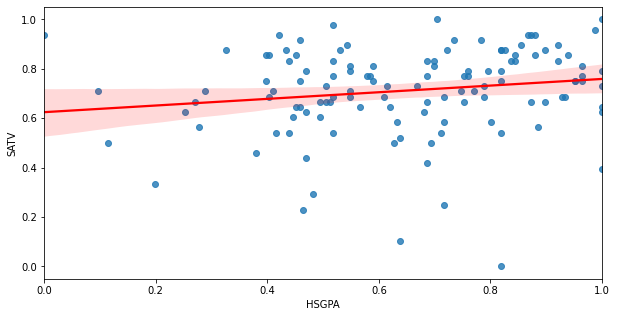

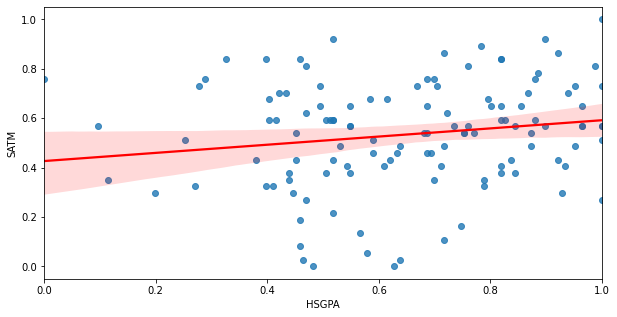

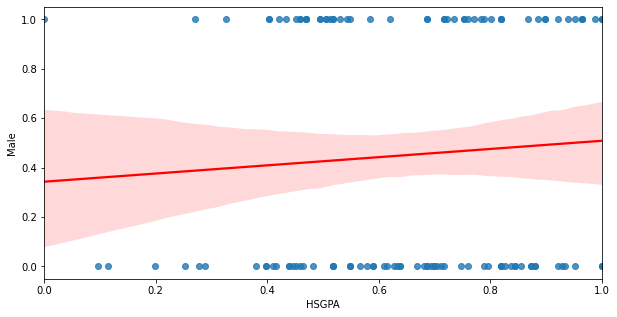

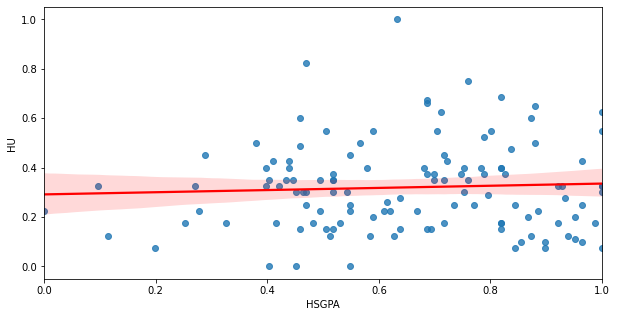

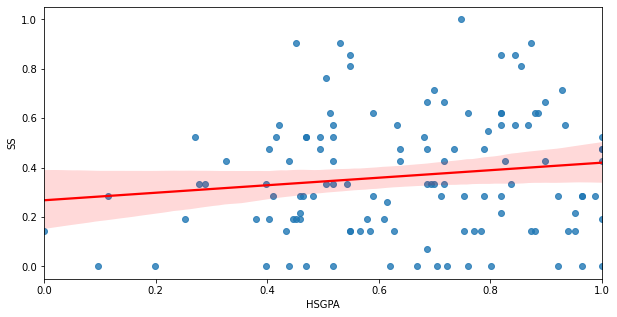

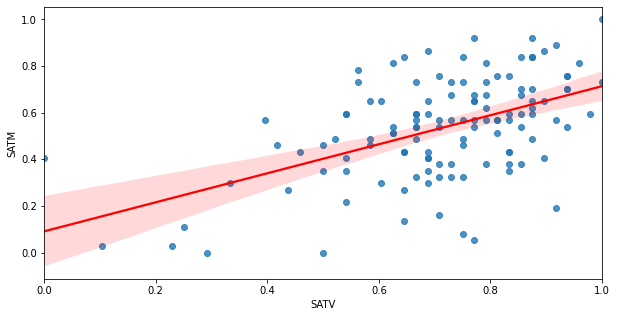

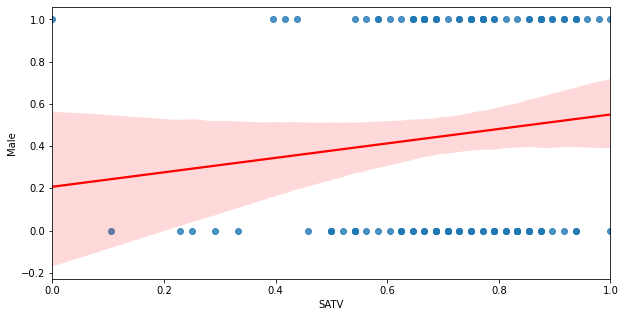

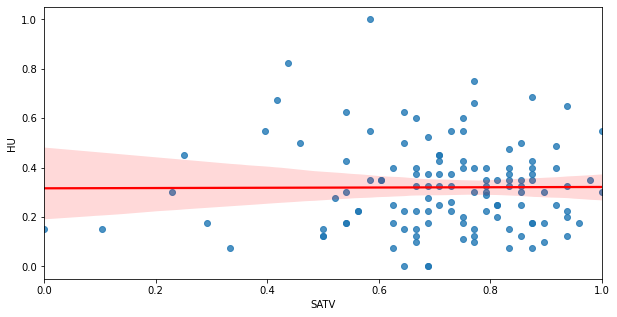

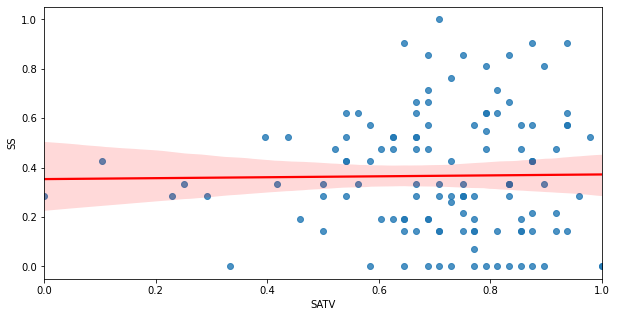

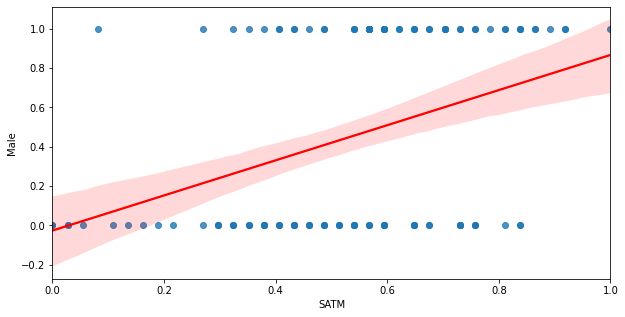

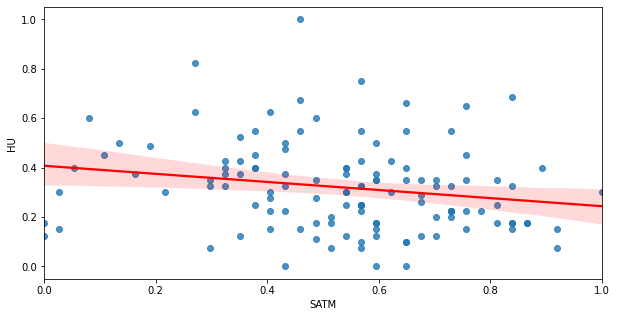

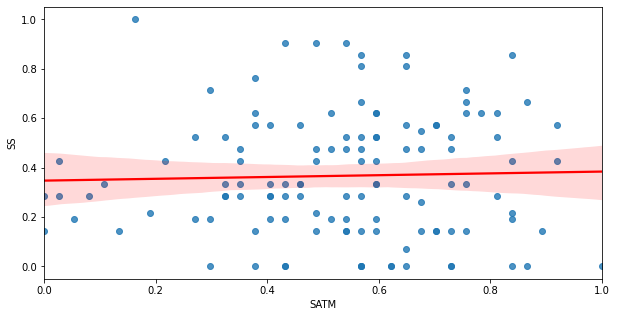

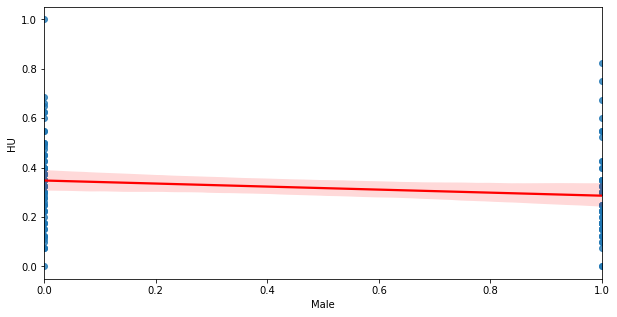

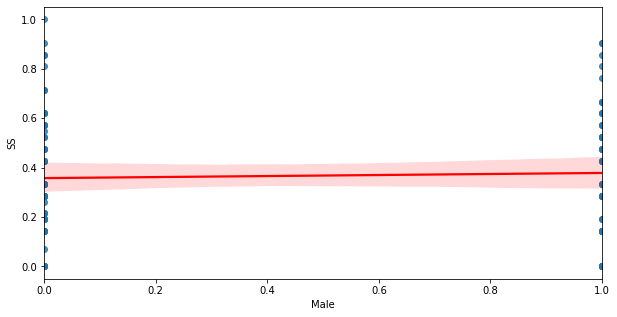

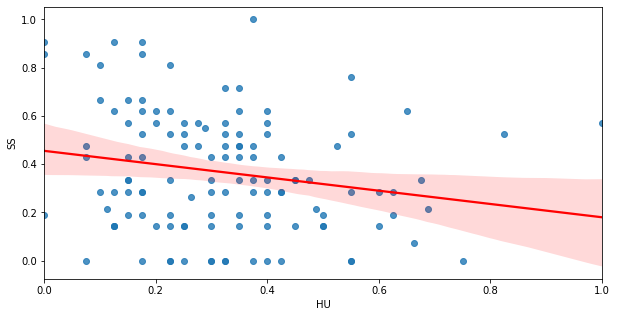

In [15]:
Explore.plot_variable_pairs(train_scaled)

In [16]:
#selecting drivers 
evaluate.select_kbest(train_scaled.drop(columns='GPA'), train.GPA, top=3)

['HSGPA', 'SATV', 'HU']

In [17]:
evaluate.select_rfe(train_scaled.drop(columns='GPA'), train.GPA, n_features_to_select=3)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Index(['HSGPA', 'SATV', 'HU'], dtype='object')

In [32]:
#Baseline 

#RMSE of both mean and median
rmse_train = evaluate.baseline_errors(train.GPA, measure = 'Mean')[2]
rmse_validate = evaluate.baseline_errors(validate.GPA, measure = "Mean")[2]

rmse_train_median    = evaluate.baseline_errors(train.GPA, measure = 'Median')[2]
rmse_validate_median = evaluate.baseline_errors(validate.GPA, measure = 'Median')[2]

In [33]:
rmse_train, rmse_validate

(0.47016293412793425, 0.4809385478337673)

In [34]:
rmse_train_median, rmse_validate_median

(0.47159478299092994, 0.4860060563331005)

In [35]:
#lets go with mean baseline